In [33]:
import os, cv2, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

# Prepare Data

- read image to rom

- resize

Read 0 of 2000
Read 50 of 2000
Read 100 of 2000
Read 150 of 2000
Read 200 of 2000
Read 250 of 2000
Read 300 of 2000
Read 350 of 2000
Read 400 of 2000
Read 450 of 2000
Read 500 of 2000
Read 550 of 2000
Read 600 of 2000
Read 650 of 2000
Read 700 of 2000
Read 750 of 2000
Read 800 of 2000
Read 850 of 2000
Read 900 of 2000
Read 950 of 2000
Read 1000 of 2000
Read 1050 of 2000
Read 1100 of 2000
Read 1150 of 2000
Read 1200 of 2000
Read 1250 of 2000
Read 1300 of 2000
Read 1350 of 2000
Read 1400 of 2000
Read 1450 of 2000
Read 1500 of 2000
Read 1550 of 2000
Read 1600 of 2000
Read 1650 of 2000
Read 1700 of 2000
Read 1750 of 2000
Read 1800 of 2000
Read 1850 of 2000
Read 1900 of 2000
Read 1950 of 2000
Read 0 of 12500
Read 50 of 12500
Read 100 of 12500
Read 150 of 12500
Read 200 of 12500
Read 250 of 12500
Read 300 of 12500
Read 350 of 12500
Read 400 of 12500
Read 450 of 12500
Read 500 of 12500
Read 550 of 12500
Read 600 of 12500
Read 650 of 12500
Read 700 of 12500
Read 750 of 12500
Read 800 of 12500


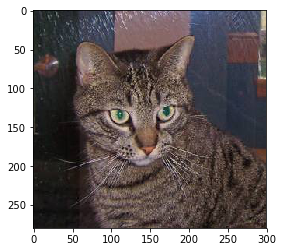

In [46]:
TRAIN_DIR = 'data/train/'
TEST_DIR = 'data/test/'

ROWS = 64
COLS = 64
CHANNELS = 3

image_show_dir = TRAIN_DIR + '/cat.1.jpg'
image_show = mpimg.imread(image_show_dir)
plt.figure()
plt.imshow(image_show)

train_dir = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]
train_dog_dir = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cat_dir = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
test_dir = [TEST_DIR + i for i in os.listdir(TEST_DIR)]

# only use 100 images in local train, remove it if trian in AWS
train_dir = train_dog_dir[:1000] + train_cat_dir[:1000]
random.shuffle(train_dir)
# test_dir = test_dir[:50]

def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)
    return image

def prepare_data(image_path_list):
    count = len(image_path_list)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype = np.uint8)
    for i, image_path in enumerate(image_path_list):
        image = read_image(image_path)
        data[i] = image.T
        if i%50 == 0: print('Read {} of {}'.format(i, count))
    return data

train_data = prepare_data(train_dir)
test_data = prepare_data(test_dir)

print('Train shape: {}'.format(train_data.shape))
print('Test shape: {}'.format(test_data.shape))

# Generate Labels

In [47]:
labels = []
for train_image_dir in train_dir:
    if 'dog' in train_image_dir:
        labels.append(1)
    else:
        labels.append(0)

# Have A Glance

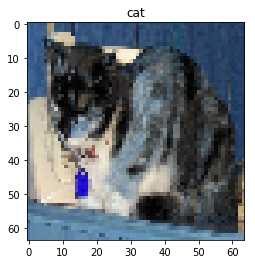

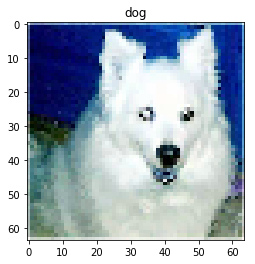

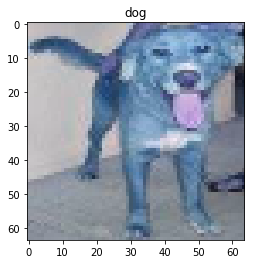

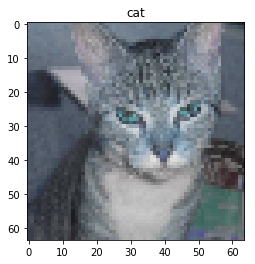

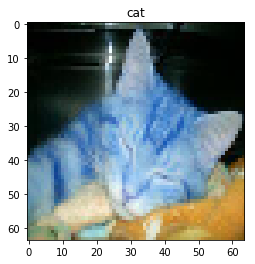

In [48]:
def show_image(idx):
    image = train_data[idx].T
    plt.figure()
    plt.imshow(image)
    if labels[idx] == 1:
        plt.title('dog')
    else:
        plt.title('cat')
    
for i in range(5):
    show_image(i)

# Define Modle

In [49]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def catdog():
    
    model = Sequential()
    
    model.add(Convolution2D(32, 3, 3, border_mode = 'same', input_shape = (3, ROWS, COLS), activation = 'relu'))
    model.add(Convolution2D(32, 3, 3, border_mode = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2), dim_ordering="th"))
    
    model.add(Convolution2D(64, 3, 3, border_mode = 'same', activation = 'relu'))
    model.add(Convolution2D(64, 3, 3, border_mode = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size= (2, 2), dim_ordering="th"))
    
    model.add(Convolution2D(128, 3, 3, border_mode = 'same', activation = 'relu'))
    model.add(Convolution2D(128, 3, 3, border_mode = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size= (2, 2), dim_ordering="th"))
    
    model.add(Convolution2D(256, 3, 3, border_mode = 'same', activation = 'relu'))
    model.add(Convolution2D(256, 3, 3, border_mode = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size= (2, 2), dim_ordering="th"))
    
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = objective, optimizer = optimizer, metrics = ['accuracy'])
    return model

model = catdog()

/anaconda3/envs/dog-project/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 64, 64..., activation="relu", padding="same")`
  '` call to the Keras 2 API: ' + signature)
/anaconda3/envs/dog-project/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  '` call to the Keras 2 API: ' + signature)
/anaconda3/envs/dog-project/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  '` call to the Keras 2 API: ' + signature)
/anaconda3/envs/dog-project/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  '` call to the 

# Train the model

In [50]:
epoch = 10
batch_size = 16

# 记下每个epoch的loss
class LossHistory(Callback):
    def on_train_begin(self, logs = {}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs = {}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1, mode = 'auto')

def run_catdog():
    history = LossHistory()
    model.fit(train_data, labels, batch_size = batch_size, nb_epoch = epoch, validation_split = 0.25, verbose = 0, shuffle = True, callbacks = [history, early_stopping])
    predictions = model.predict(test_data, verbose = 0)
    return predictions, history

predictions, history = run_catdog()

/anaconda3/envs/dog-project/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


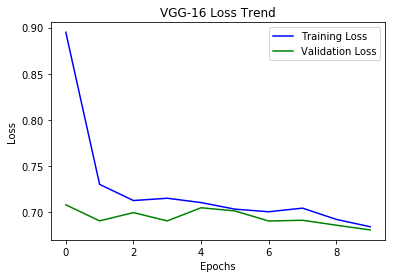

In [51]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epoch)[0::2])
plt.legend()
plt.show()

# Predict

I am 50.01% sure this is a Cat


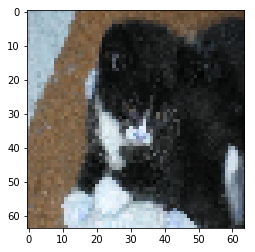

I am 53.57% sure this is a Dog


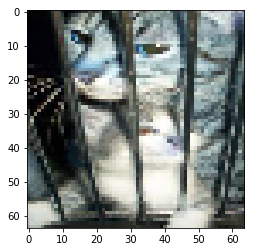

I am 57.14% sure this is a Dog


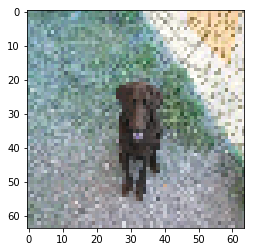

I am 58.20% sure this is a Dog


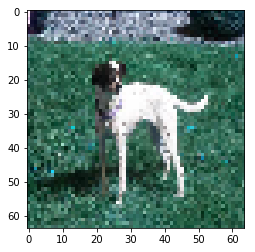

I am 54.96% sure this is a Dog


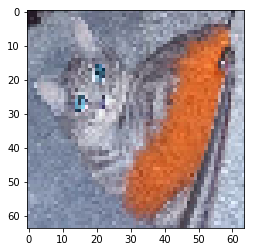

I am 57.83% sure this is a Dog


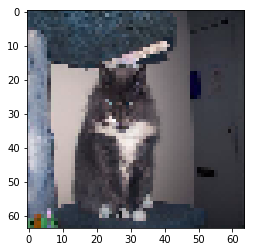

I am 59.36% sure this is a Dog


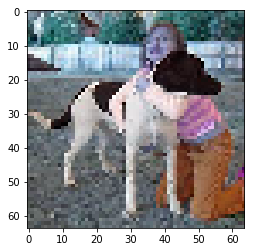

I am 55.47% sure this is a Dog


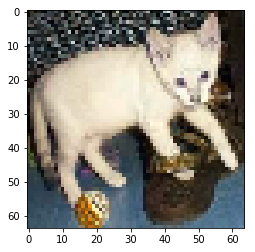

I am 57.56% sure this is a Dog


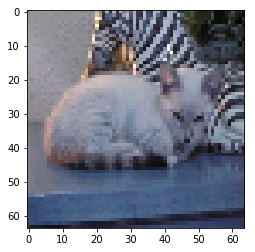

I am 55.67% sure this is a Cat


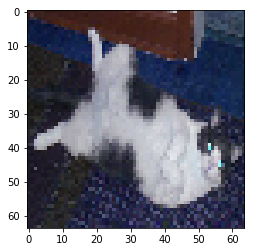

In [52]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test_data[i].T)
    plt.show()

In [67]:
import csv

#python2可以用file替代open
with open("submission.csv","w") as csvfile: 
    writer = csv.writer(csvfile)

    #先写入columns_name
    writer.writerow(["id","label"])
    for i in range(12500):
        writer.writerow([i + 1, predictions[i][0]])